## Hotel Booking Demand

<img src="https://github.com/robinyUArizona/MIS-586-Big-Data-Project/blob/master/hotel_booking_pic.PNG?raw=true" style="width:1100px;height:300px" />

### Library Installation

In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} plotly

### Import Libraries

In [2]:

" Common libraries " 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline



### Load 'hotel_bookings.csv" data

In [3]:
""" 
    - load the data into a Pandas dataframe
    - display first 5 rows from dataframe 
    - information for the datasets
    
"""
hotel_data = pd.read_csv("hotel_bookings.csv")
print("Number of records (rows) Hotel Bookings Demand Datasets: ", hotel_data.shape[0])
print("Number of features (columns) Hotel Bookings Demand Datasets: ", hotel_data.shape[1])
print("\nColumns names of the hotel booking datasets: \n", hotel_data.columns.tolist())

print("\nFirst 5 records of the datasets: ")
display(hotel_data.head())

print("\n\n\nHotel Bookings Demand Datasets Information: ")
display(hotel_data.info())


Number of records (rows) Hotel Bookings Demand Datasets:  119390
Number of features (columns) Hotel Bookings Demand Datasets:  32

Columns names of the hotel booking datasets: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']

First 5 records of the datasets: 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03





Hotel Bookings Demand Datasets Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                        

None

### Listing numerical and categorical data types columns

In [4]:
# print(" Columns names and their types: \n", hotel_data.dtypes)

num_int_type = hotel_data.select_dtypes(include='int64').columns.tolist()
print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = hotel_data.select_dtypes(include='float64').columns.tolist()
print("\nNumeric-Float Types columns name: \n", num_float_type)

cat_object_type = hotel_data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric-Integer Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

Numeric-Float Types columns name: 
 ['children', 'agent', 'company', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


### Find the duplicate records (rows) in hotel booking demand datasets

In [5]:
"""
    - find and remove duplicate rows in hotel_data
"""

# check the number of duplicated rows
# no. of rows is identical to other row or rows
print("No. of duplicate rows: ", hotel_data.duplicated(keep='first').sum()) 

# Check for this duplicate rows as a dataframe
display(hotel_data.loc[hotel_data.duplicated(keep='first')])


### Remove the duplicate rows #####
new_hotel_data = hotel_data.drop_duplicates(keep='first')
# check the dataset dimension
print("\nDimesnion of hotel_data after removing duplicates: ", new_hotel_data.shape)


No. of duplicate rows:  31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03



Dimesnion of hotel_data after removing duplicates:  (87396, 32)


### Summary of Statistics
- To know more about missing values in the hotel booking demand dataset
- Summarizing numerical and categorical columns seperately

In [6]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
num_type = num_int_type + num_float_type
display(new_hotel_data[num_type].describe().T)
# display(new_hotel_data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(new_hotel_data[cat_object_type].describe().T)
# display(new_hotel_data.describe(include = ['O']).T)

print(new_hotel_data[cat_object_type].hotel.value_counts())


# just checking size for cat and num
print("\nTotal must be 32 features otherwise missing some columns")
print(new_hotel_data[num_type].shape)
print(new_hotel_data[cat_object_type].shape)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0



Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,86944,177,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

Total must be 32 features otherwise missing some columns
(87396, 20)
(87396, 12)


### Clean the data: Data Wrangling
#### Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<ul>
    <li>Identify and handle missing values
        <ul>
            <li>Nested Identify missing values</li>
            <li>Nested Deal with missing values</li>
            <li>Nested Correct data format</li>
        </ul>
    </li>
    <li>check</li>
</ul>


In [7]:
"""
    - Identify the missing values
"""
## 
missing_data = new_hotel_data.isnull().sum()
print("No. of missing data in each columns: \n", missing_data)

# print("\n Columns name of hotel bookings demand dataset: \n", new_hotel_data.columns )

columns_with_missing_value = new_hotel_data.columns[hotel_data.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)

"""
 - Robin: I checked the missing values and I found that all missing values are already NaN
  check using: hotel_data.isna().sum()
 - NaN (Not a Number), which is Python's default missing value marker

"""

columns_with_nan = new_hotel_data.columns[hotel_data.isna().any()].tolist()
print("\n Columns name which has NaN: ", columns_with_nan)

## verifying
print("\n Missing Values are equals to NaN: ", columns_with_missing_value == columns_with_nan)


No. of missing data in each columns: 
 hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
c

## Removing 'country', 'agent' and 'company' features


In [8]:
##  Deleting ''counrty', agent' and'company' Columns

print("Name of all columns: \n", new_hotel_data.columns.tolist())
new_hotel_data = new_hotel_data.drop(['country', 'agent', 'company'], axis=1)
print("\n\nName of all columns: \n", new_hotel_data.columns.tolist())

Name of all columns: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


Name of all columns: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_booki

## New list of Numerical and Categorical  Data

In [9]:
# print(" Columns names and their types: \n", hotel_data.dtypes)

num_int_type = new_hotel_data.select_dtypes(include='int64').columns.tolist()
print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = new_hotel_data.select_dtypes(include='float64').columns.tolist()
print("\nNumeric-Float Types columns name: \n", num_float_type)

num_type = num_int_type + num_float_type
print("\nNumeric Types columns name: \n", num_type)

cat_object_type = new_hotel_data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric-Integer Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

Numeric-Float Types columns name: 
 ['children', 'adr']

Numeric Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'children', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_ro

## Analysis of Target Varibale 'is_cancelled'

Text(0, 0.5, 'Total Count')

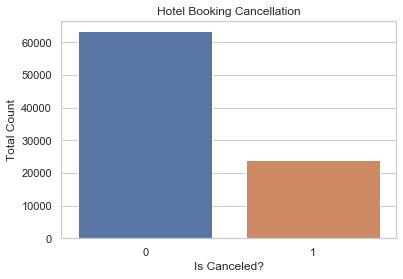

In [10]:
## is_cancelled

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=new_hotel_data)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

In [11]:
booking_cancel = (new_hotel_data['is_canceled'] == 1).sum()
print("No. of booking canceled: ", booking_cancel)
not_booking_cancel = (new_hotel_data['is_canceled'] == 0).sum()
print("No. of booking not canceled: ", not_booking_cancel)
total_booking = booking_cancel + not_booking_cancel
print("Total count: ", total_booking)
print("% of booking cancelation: ", (booking_cancel/total_booking) * 100, "%" )

No. of booking canceled:  24025
No. of booking not canceled:  63371
Total count:  87396
% of booking cancelation:  27.489816467572886 %


In [12]:
## Some summary Table
booking_cancell = new_hotel_data[new_hotel_data['is_canceled'] == 1]
display(booking_cancell.head())
not_booking_cancell = new_hotel_data[new_hotel_data['is_canceled'] == 0]
display(not_booking_cancell.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Analyze Numerical Features

In [13]:
print("\nNumerical columns name of hotel bookings demand dataset: \n", new_hotel_data[num_type].columns.tolist())


Numerical columns name of hotel bookings demand dataset: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'children', 'adr']


In [14]:
""" Visualize the Numerical Features """
def visualize_num_feature(new_hotel_data):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(new_hotel_data)
    plt.subplot(1,2,2)
    sns.distplot(new_hotel_data, bins=20)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(new_hotel_data):
    stat =  new_hotel_data.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))
    

Visulaize lead_time Feature


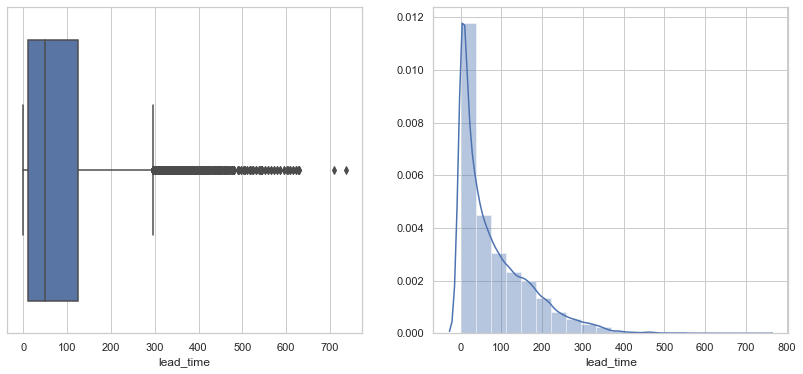

count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64
The upper and lower bounds for suspected outliers are 296.0 and -160.0


In [15]:
### lead_time
print('Visulaize lead_time Feature')
visualize_num_feature(new_hotel_data.lead_time)
stat_summary(new_hotel_data.lead_time)  

In [16]:
## "lead_time"
# The upper and lower bounds for suspected outliers are 296.0 and -160.0
# lower outlier -160.0 does not make sense - I will explain why we are getting this
# I am just choosing
remain_lead_time = new_hotel_data.lead_time < 500
print(remain_lead_time.shape)
new_hotel_data = new_hotel_data[remain_lead_time]
print(new_hotel_data.shape)

(87396,)
(87320, 29)


Visulaize arrival_date_year Feature


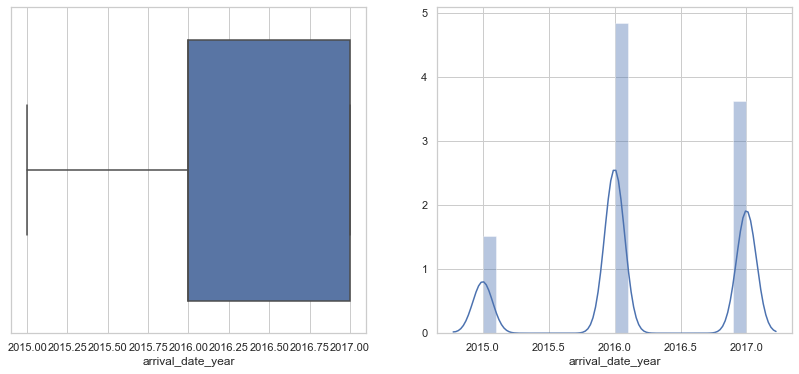

count    87320.000000
mean      2016.210021
std          0.686146
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64
The upper and lower bounds for suspected outliers are 2018.5 and 2014.5


In [17]:
### arrival_date_year
print('Visulaize arrival_date_year Feature')
visualize_num_feature(new_hotel_data.arrival_date_year)
stat_summary(new_hotel_data.arrival_date_year) 

In [18]:
## "arrival_date_year"
# Its has 3-different years like, "2015", "2016", "2017"
print(new_hotel_data.arrival_date_year.unique().tolist())
print(new_hotel_data.arrival_date_year.dtypes)

# "2015", "2016", "2017" are the big number and will effect model learning
new_hotel_data = new_hotel_data.replace({'arrival_date_year': {2015: 1, 2016: 2, 2017: 3}})
new_hotel_data.head()

[2015, 2016, 2017]
int64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,1,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,1,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,1,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,1,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,1,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


Visulaize arrival_date_week_number Feature


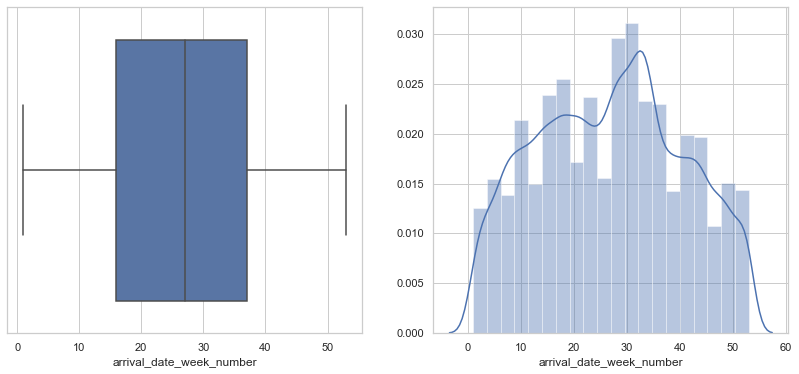

count    87320.000000
mean        26.836967
std         13.671303
min          1.000000
25%         16.000000
50%         27.000000
75%         37.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64
The upper and lower bounds for suspected outliers are 68.5 and -15.5


In [19]:
### arrival_date_week_number
print('Visulaize arrival_date_week_number Feature')
visualize_num_feature(new_hotel_data.arrival_date_week_number)
stat_summary(new_hotel_data.arrival_date_week_number) 

## looks good

Visulaize arrival_date_day_of_month Feature


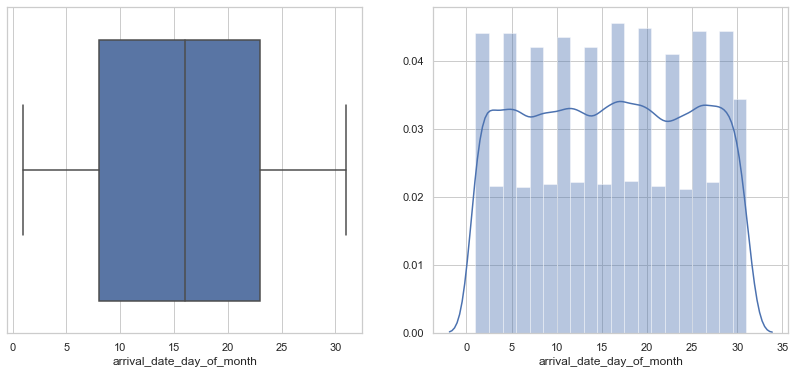

count    87320.000000
mean        15.813754
std          8.834888
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64
The upper and lower bounds for suspected outliers are 45.5 and -14.5


In [20]:
### arrival_date_day_of_month
print('Visulaize arrival_date_day_of_month Feature')
visualize_num_feature(new_hotel_data.arrival_date_day_of_month)
stat_summary(new_hotel_data.arrival_date_day_of_month) 

# looks good

Visulaize stays_in_weekend_nights Feature


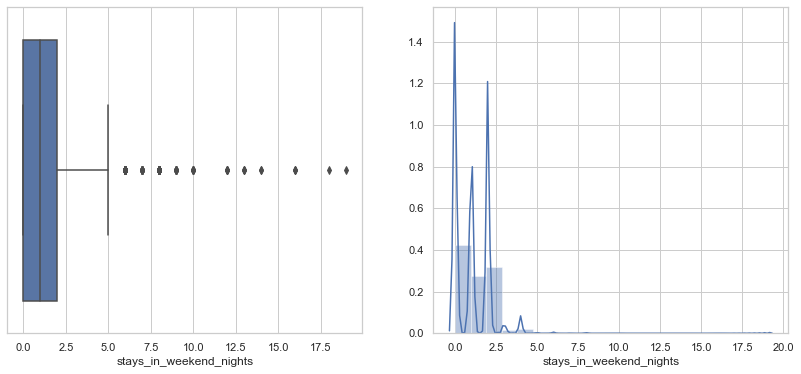

count    87320.000000
mean         1.005279
std          1.031677
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64
The upper and lower bounds for suspected outliers are 5.0 and -3.0


In [21]:
### stays_in_weekend_nights
print('Visulaize stays_in_weekend_nights Feature')
visualize_num_feature(new_hotel_data.stays_in_weekend_nights)
stat_summary(new_hotel_data.stays_in_weekend_nights) 

In [22]:
print("Before: ", new_hotel_data.shape)

stays_in_weekend_nights_extra = new_hotel_data.stays_in_weekend_nights < 5.0
# print(stays_in_weekend_nights_extra)
new_hotel_data = new_hotel_data[stays_in_weekend_nights_extra]
print("After: ", new_hotel_data.shape)


Before:  (87320, 29)
After:  (87031, 29)


Visulaize stays_in_week_nights Feature


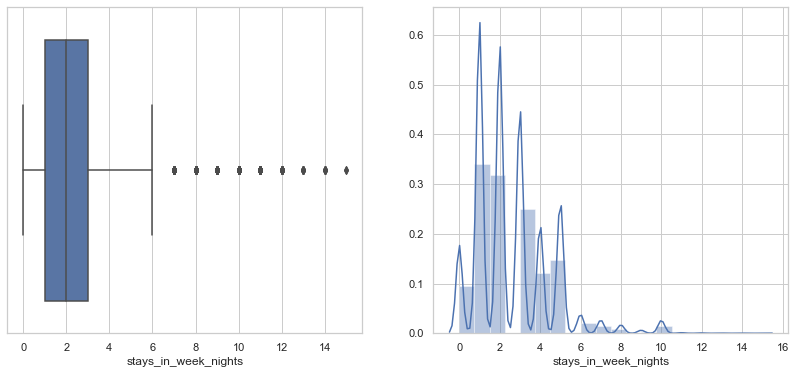

count    87031.000000
mean         2.578300
std          1.855897
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: stays_in_week_nights, dtype: float64
The upper and lower bounds for suspected outliers are 6.0 and -2.0


In [23]:
### stays_in_week_nights
print('Visulaize stays_in_week_nights Feature')
visualize_num_feature(new_hotel_data.stays_in_week_nights)
stat_summary(new_hotel_data.stays_in_week_nights) 

In [24]:
print("Before: ", new_hotel_data.shape)

stays_in_week_nights_extra = new_hotel_data.stays_in_week_nights < 10
# print(stays_in_week_nights_extra)
new_hotel_data = new_hotel_data[stays_in_week_nights_extra]
print("After: ", new_hotel_data.shape)

Before:  (87031, 29)
After:  (86009, 29)


count    86009.000000
mean         1.876408
std          0.628722
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64
The upper and lower bounds for suspected outliers are 2.0 and 2.0


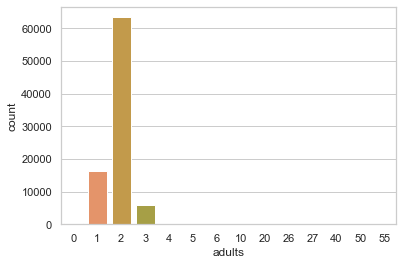

In [25]:
### adults
sns.countplot(x="adults", data=new_hotel_data)
stat_summary(new_hotel_data.adults)

In [26]:
print("Before: ", new_hotel_data.shape)

print("No. of Adults and  their frequencies:\n", new_hotel_data.adults.value_counts())

## Yo "Imputation"
adults_extra = new_hotel_data.adults < 5
print(adults_extra)

new_hotel_data = new_hotel_data[adults_extra]
print("After: ", new_hotel_data.shape)

Before:  (86009, 29)
No. of Adults and  their frequencies:
 2     63404
1     16266
3      5893
0       370
4        60
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64
0         True
2         True
3         True
4         True
6         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Name: adults, Length: 86009, dtype: bool
After:  (85993, 29)


count    85993.000000
mean         0.010908
std          0.114113
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


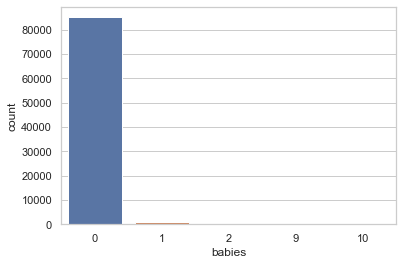

In [27]:
# ### babies
sns.countplot(x="babies", data=new_hotel_data)
stat_summary(new_hotel_data.babies)

In [28]:
print("Before: ", new_hotel_data.shape)

print("No. of Babies and  their frequencies:\n", new_hotel_data.babies.value_counts())

babies_extra = new_hotel_data.babies < 3
print(adults_extra)


new_hotel_data = new_hotel_data[babies_extra]
print("After: ", new_hotel_data.shape)

Before:  (85993, 29)
No. of Babies and  their frequencies:
 0     85087
1       889
2        15
10        1
9         1
Name: babies, dtype: int64
0         True
2         True
3         True
4         True
6         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Name: adults, Length: 86009, dtype: bool
After:  (85991, 29)


count    85991.000000
mean         0.039365
std          0.194462
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


Guest Repeated:
 0    82606
1     3385
Name: is_repeated_guest, dtype: int64


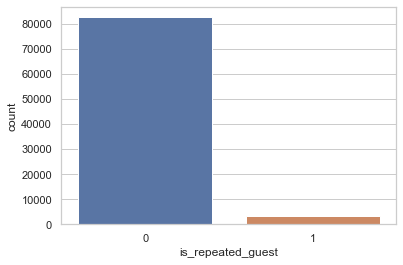

In [29]:
# ### is_repeated_guest
sns.countplot(x="is_repeated_guest", data=new_hotel_data)
stat_summary(new_hotel_data.is_repeated_guest)

print("\n\nGuest Repeated:\n", new_hotel_data.is_repeated_guest.value_counts())

## Looks good

count    85991.000000
mean         0.030608
std          0.371715
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


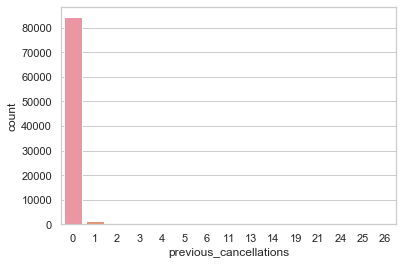

In [30]:
# ### previous_cancellations
sns.countplot(x="previous_cancellations", data=new_hotel_data)
stat_summary(new_hotel_data.previous_cancellations)

In [31]:
print("Before: ", new_hotel_data.shape)

print("\n\nprevious_cancellations and their frequencies:\n", new_hotel_data.previous_cancellations.value_counts())

prev_cancel_extra = new_hotel_data.previous_cancellations < 20
# print(prev_cancel_extra)

new_hotel_data = new_hotel_data[prev_cancel_extra]
print("\n\nAfter: ", new_hotel_data.shape)

Before:  (85991, 29)


previous_cancellations and their frequencies:
 0     84331
1      1383
2       111
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
21        1
19        1
14        1
Name: previous_cancellations, dtype: int64


After:  (85985, 29)


count    85985.000000
mean         0.186312
std          1.745213
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: previous_bookings_not_canceled, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


previous_bookings_not_canceled:
 0    82601
1     3384
Name: is_repeated_guest, dtype: int64


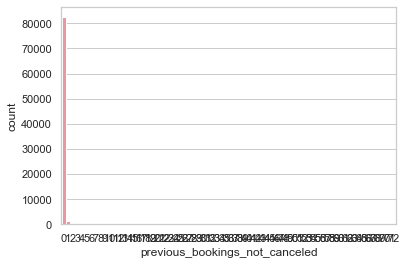

In [32]:
# ### previous_bookings_not_canceled
sns.countplot(x="previous_bookings_not_canceled", data=new_hotel_data)
stat_summary(new_hotel_data.previous_bookings_not_canceled)
print("\n\nprevious_bookings_not_canceled:\n", new_hotel_data.is_repeated_guest.value_counts())

# looks good

In [33]:
print("Before: ", new_hotel_data.shape)

print("\n\nprevious_bookings_not_canceled and their frequencies:\n", new_hotel_data.previous_bookings_not_canceled.\
      value_counts())

prev_not_cancel_extra = new_hotel_data.previous_bookings_not_canceled < 30
# print(prev_cancel_extra)


new_hotel_data = new_hotel_data[prev_not_cancel_extra]
print("\n\nAfter: ", new_hotel_data.shape)

Before:  (85985, 29)


previous_bookings_not_canceled and their frequencies:
 0     82477
1      1455
2       573
3       330
4       227
      ...  
47        1
36        1
49        1
50        1
63        1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64


After:  (85934, 29)


count    85934.000000
mean         0.268578
std          0.707294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: booking_changes, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


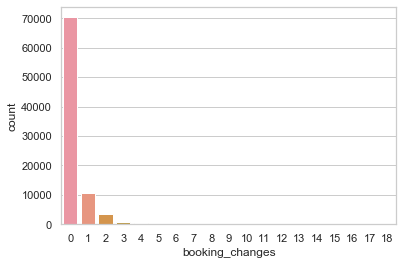

In [34]:
# ### booking_changes
sns.countplot(x="booking_changes", data=new_hotel_data)
stat_summary(new_hotel_data.booking_changes)

In [35]:
print("Before: ", new_hotel_data.shape)

print("\n\nbooking_changes and their frequencies:\n", new_hotel_data.booking_changes.value_counts())

booking_changes_extra = new_hotel_data.booking_changes < 10
# print(booking_changes_extra)

new_hotel_data = new_hotel_data[booking_changes_extra]
print("\n\nAfter: ", new_hotel_data.shape)

Before:  (85934, 29)


booking_changes and their frequencies:
 0     70335
1     10735
2      3426
3       857
4       345
5       110
6        53
7        29
8        15
9         8
10        5
13        4
14        3
15        3
16        2
17        1
11        1
12        1
18        1
Name: booking_changes, dtype: int64


After:  (85913, 29)


count    85913.000000
mean         0.759687
std         10.091504
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


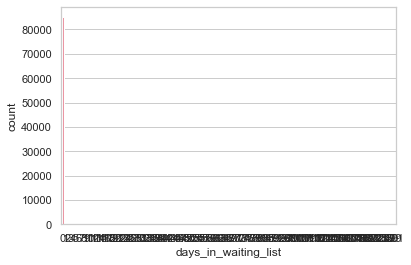

In [36]:
# ### days_in_waiting_list
sns.countplot(x="days_in_waiting_list", data=new_hotel_data)
stat_summary(new_hotel_data.days_in_waiting_list)

In [37]:
print("Before: ", new_hotel_data.shape)

print("\n\ndays_in_waiting_list:\n", new_hotel_data.days_in_waiting_list.value_counts())

# days_in_waiting_list_extra = new_hotel_data.days_in_waiting_list.value_counts()
# days_wait = days_in_waiting_list_extra[days_in_waiting_list_extra > 10] ## randomly picked 10

# print(days_wait)

# new_hotel_data = new_hotel_data[days_wait]

# print("\n\nAfter: ", new_hotel_data.shape)

Before:  (85913, 29)


days_in_waiting_list:
 0      85057
63        53
87        25
44        23
15        22
       ...  
62         1
81         1
92         1
54         1
183        1
Name: days_in_waiting_list, Length: 127, dtype: int64


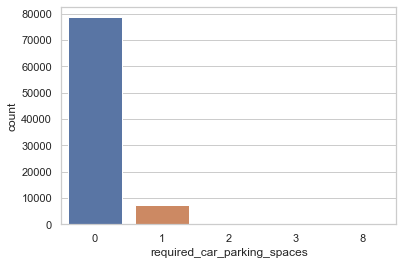

In [38]:
# ### required_car_parking_spaces
sns.countplot(x="required_car_parking_spaces", data=new_hotel_data)


In [39]:
print("Before: ", new_hotel_data.shape)

print("\n\nrequired_car_parking_spaces:\n", new_hotel_data.required_car_parking_spaces.value_counts())

Before:  (85913, 29)


required_car_parking_spaces:
 0    78663
1     7220
2       26
8        2
3        2
Name: required_car_parking_spaces, dtype: int64


Visulaize total_of_special_requests Feature


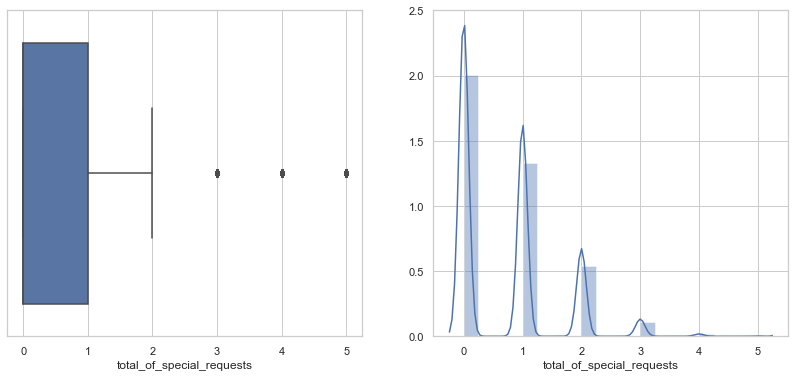

count    85913.000000
mean         0.699603
std          0.831601
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64
The upper and lower bounds for suspected outliers are 2.5 and -1.5


In [40]:
### total_of_special_requests
print('Visulaize total_of_special_requests Feature')
visualize_num_feature(new_hotel_data.total_of_special_requests)
stat_summary(new_hotel_data.total_of_special_requests) 

In [41]:
print("Before: ", new_hotel_data.shape)

print("\n\ntotal_of_special_requests and their frequencies:\n", new_hotel_data. \
      total_of_special_requests.value_counts())

# special_requests_extra = new_hotel_data.total_of_special_requests < 5
# # print(booking_changes_extra)

# new_hotel_data = new_hotel_data[special_requests_extra]
# print("\n\nAfter: ", new_hotel_data.shape)

Before:  (85913, 29)


total_of_special_requests and their frequencies:
 0    43067
1    28591
2    11632
3     2277
4      311
5       35
Name: total_of_special_requests, dtype: int64


count    85909.000000
mean         0.139310
std          0.455609
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: children, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


Children and their frequencies:
 0.0    77632
1.0     4661
2.0     3541
3.0       75
NaN        4
Name: children, dtype: int64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,1,August,32,3,1,0,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,1,August,32,5,0,2,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,1,August,32,5,0,2,3,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,1,August,33,13,2,5,2,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


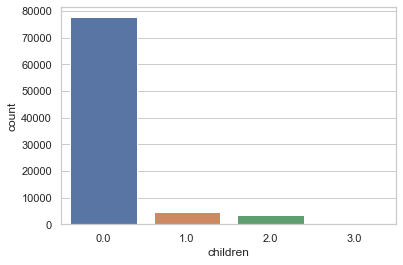

In [42]:
# ### children
sns.countplot(x="children", data=new_hotel_data)
stat_summary(new_hotel_data.children)

print("\n\nChildren and their frequencies:\n", new_hotel_data.children.value_counts(dropna=False))
display(new_hotel_data[new_hotel_data.children.isnull()])

# Replace NaN with 0 children
new_hotel_data['children'] = new_hotel_data['children'].replace(np.nan, 0)
display(new_hotel_data[new_hotel_data.children.isnull()])

Visulaize adr Feature


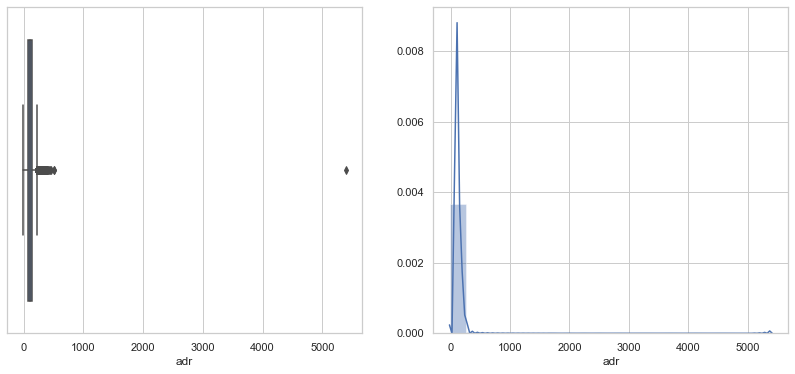

count    85913.000000
mean       106.636862
std         55.072081
min         -6.380000
25%         72.250000
50%         98.800000
75%        134.300000
max       5400.000000
Name: adr, dtype: float64
The upper and lower bounds for suspected outliers are 227.37500000000003 and -20.825000000000017


In [43]:
### adr
print('Visulaize adr Feature')
visualize_num_feature(new_hotel_data.adr)
stat_summary(new_hotel_data.adr) 

## may need to do imputation

# Feature Selection
- Correlation Matrix and Heat-Map
- Recursive Feature Elimination
- Feature Importance (ExtraTreesClassifier())

## Correlation of Numerical Features

 Heat map for categorical columns: 


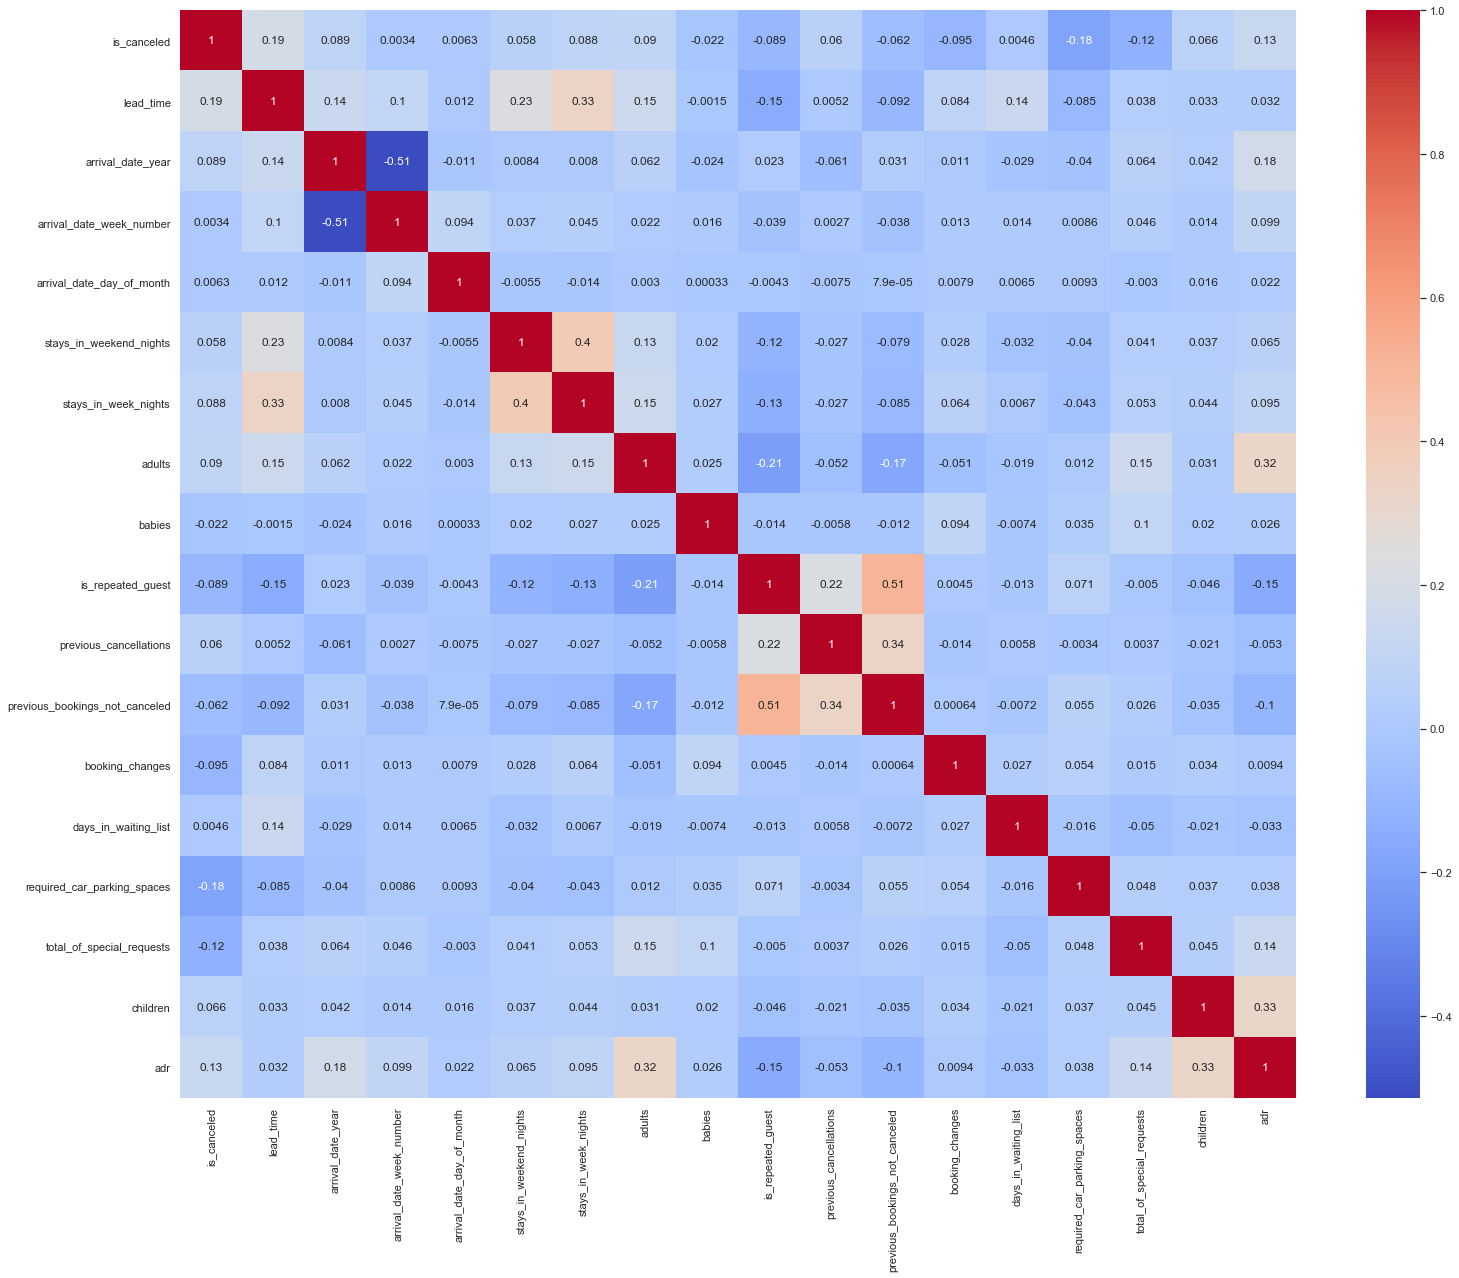

In [44]:
### Correlation

# unwanted_num = {'agent', 'company'} 
# num_type_1 = [ele for ele in num_type if ele not in unwanted_num]

corr_matrix = new_hotel_data[num_type].corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(25,20))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

### Sort out the Important Numerical Features

In [45]:
num_fea_corr = new_hotel_data.corr()["is_canceled"]
num_fea_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.187691
required_car_parking_spaces       0.184551
adr                               0.128993
total_of_special_requests         0.119362
booking_changes                   0.095141
adults                            0.089962
is_repeated_guest                 0.089114
arrival_date_year                 0.088566
stays_in_week_nights              0.088376
children                          0.066225
previous_bookings_not_canceled    0.062302
previous_cancellations            0.059652
stays_in_weekend_nights           0.058495
babies                            0.021600
arrival_date_day_of_month         0.006291
days_in_waiting_list              0.004634
arrival_date_week_number          0.003432
Name: is_canceled, dtype: float64

## Recursive Feature Elimination



In [46]:
X_numeric = new_hotel_data[num_type]
X_numeric = X_numeric.drop('is_canceled', axis=1)
y = new_hotel_data['is_canceled']

print(X_numeric.shape)
print(X_numeric.info())

(85913, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 85913 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       85913 non-null  int64  
 1   arrival_date_year               85913 non-null  int64  
 2   arrival_date_week_number        85913 non-null  int64  
 3   arrival_date_day_of_month       85913 non-null  int64  
 4   stays_in_weekend_nights         85913 non-null  int64  
 5   stays_in_week_nights            85913 non-null  int64  
 6   adults                          85913 non-null  int64  
 7   babies                          85913 non-null  int64  
 8   is_repeated_guest               85913 non-null  int64  
 9   previous_cancellations          85913 non-null  int64  
 10  previous_bookings_not_canceled  85913 non-null  int64  
 11  booking_changes                 85913 non-null  int64  
 12  days_in_waiting_lis

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(solver='lbfgs')

# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_numeric, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\yrobi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\yrobi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\yrobi\Anaconda3\lib\site-packages

[False False False False False False False False  True  True False False
 False  True False False False]
[15  7 11 14 10  8  3  9  1  1  2  6 13  1  4  5 12]


## Feature Importance (ExtraTreesClassifier())

[0.22032922 0.02131743 0.12047982 0.12805087 0.0402778  0.07510088
 0.02715405 0.00244049 0.00648885 0.02825711 0.00431405 0.03503969
 0.00405411 0.03179885 0.05354984 0.01480736 0.18653958]


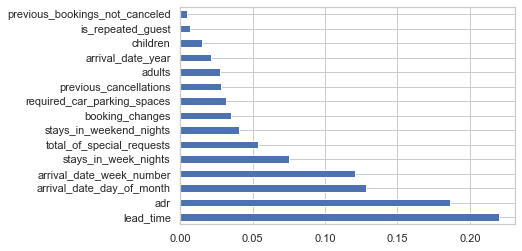

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_numeric, y)
# display the relative importance of each attribute
print(model.feature_importances_)

# feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_numeric.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [49]:
num_type

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'children',
 'adr']

## Based on Feature Importance
### Removing  
- 'babies', 
- 'days_in_waiting_list', 

In [50]:
new_hotel_data = new_hotel_data.drop(['babies', 'days_in_waiting_list'], axis=1)
new_hotel_data.shape

(85913, 27)

In [51]:
## Checking for the stay at weekday nights at city hotel and resort hotel
# pd.crosstab(not_booking_cancell['stays_in_week_nights'], not_booking_cancell['hotel'])

In [52]:
# count of members checked out from the two hotels
pd.crosstab(not_booking_cancell['hotel'],not_booking_cancell['reservation_status'])

reservation_status,Check-Out
hotel,
City Hotel,37379
Resort Hotel,25992


In [53]:
#  count of members canceled and no-show in those two hotels
pd.crosstab(booking_cancell['hotel'], booking_cancell['reservation_status'])

reservation_status,Canceled,No-Show
hotel,,
City Hotel,15301,748
Resort Hotel,7710,266


In [54]:
pd.crosstab(not_booking_cancell['hotel'], not_booking_cancell['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
hotel,,,
City Hotel,37350,24,5
Resort Hotel,25885,31,76


In [55]:
pd.crosstab(booking_cancell['hotel'], booking_cancell['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
hotel,,,
City Hotel,15218,821,10
Resort Hotel,7798,162,16


In [56]:
booking_cancell['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

## Visualization of Categorical Features

### Customer Type Feature

Text(0, 0.5, 'Total Count')

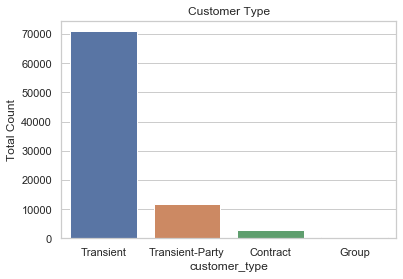

In [57]:
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(x="customer_type", data = new_hotel_data, \
                   order = new_hotel_data['customer_type'].value_counts().index)
plt.title('Customer Type')
plt.xlabel('customer_type')
plt.ylabel('Total Count')

### Visulaization of Market Segment Features

Text(0, 0.5, 'Count')

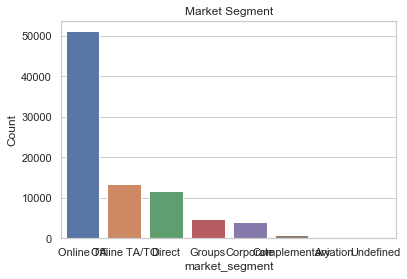

In [58]:
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(x="market_segment", data = new_hotel_data, \
                   order = new_hotel_data['market_segment'].value_counts().index)
plt.title('Market Segment')
plt.xlabel('market_segment')
plt.ylabel('Count')

### Reservation Status

Text(0, 0.5, 'Count')

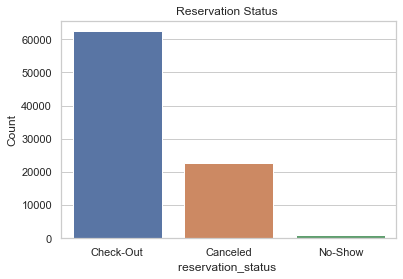

In [59]:
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(x="reservation_status", data = new_hotel_data, \
                   order = new_hotel_data['reservation_status'].value_counts().index)
plt.title('Reservation Status ')
plt.xlabel('reservation_status ')
plt.ylabel('Count') 

## Feature selection for Categorical Features
- Chi Square Test
- Fisher Score


In [60]:
cat_object_type = new_hotel_data.select_dtypes(include='object').columns.tolist()
print("Categorical Types columns name: \n", cat_object_type)

X_cat = new_hotel_data[cat_object_type]
display(X_cat.head())

y = new_hotel_data['is_canceled']

Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
6,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-03


In [61]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
X_cat = X_cat.apply(lambda col: le.fit_transform(col))
X_cat.head(10)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,5,0,3,1,2,2,0,2,1,120
2,1,5,0,3,1,0,2,0,2,1,121
3,1,5,0,2,0,0,0,0,2,1,121
4,1,5,0,6,3,0,0,0,2,1,122
6,1,5,0,3,1,2,2,0,2,1,122
7,1,5,1,3,1,2,2,0,2,1,122
8,1,5,0,6,3,0,0,0,2,0,71
9,1,5,2,5,3,3,3,0,2,0,60
10,1,5,0,6,3,4,4,0,2,0,113
11,1,5,2,6,3,3,3,0,2,1,124


In [62]:

# # import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder

# # instantiate OneHotEncoder
# ohe = OneHotEncoder(sparse=False )

# # apply OneHotEncoder on categorical feature columns
# X_ohe = ohe.fit_transform(X_cat) # It returns an numpy array
# X_ohe

In [63]:
# df = pd.DataFrame(data=X_ohe)
# df

In [64]:
X = X_cat.copy()
print(X.shape)
y = new_hotel_data['is_canceled']
print(y.shape)

(85913, 11)
(85913,)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
from sklearn.feature_selection import chi2

f_score = chi2(X_train, y_train)
f_score

(array([1.94456708e+02, 2.85238723e+02, 2.75580066e+02, 8.30103731e+02,
        5.72443052e+02, 4.67477241e+02, 5.78574750e+02, 1.43409542e+03,
        1.16162541e+01, 1.54698522e+04, 6.63750096e+03]),
 array([3.38520934e-044, 5.42031696e-064, 6.89927271e-062, 1.53857072e-182,
        1.65154000e-126, 1.13433842e-103, 7.65776793e-128, 0.00000000e+000,
        6.53779404e-004, 0.00000000e+000, 0.00000000e+000]))

In [67]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace=True)
p_values


## Comment: Lowest the p-values---- more important it is

deposit_type                0.000000e+00
reservation_status          0.000000e+00
reservation_status_date     0.000000e+00
market_segment             1.538571e-182
assigned_room_type         7.657768e-128
distribution_channel       1.651540e-126
reserved_room_type         1.134338e-103
arrival_date_month          5.420317e-64
meal                        6.899273e-62
hotel                       3.385209e-44
customer_type               6.537794e-04
dtype: float64

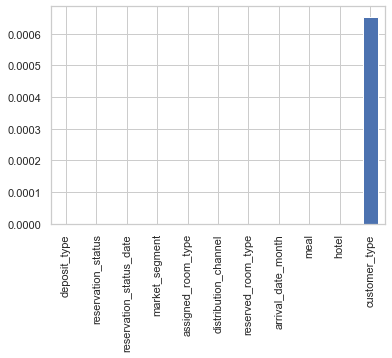

In [68]:
# plot
p_values.plot.bar()

## From above Fisher Score and Chi2 test
### Removing 'deposit_type', 'reservation_status', and 'reservation_status_date' Features

In [69]:
new_hotel_data = new_hotel_data.drop(['reservation_status', 'reservation_status_date', 'deposit_type'], axis=1)
new_hotel_data.shape

(85913, 24)

# After Data Cleaning:

In [70]:
print("Number of records (rows) Hotel Bookings Demand Datasets: ", new_hotel_data.shape[0])
print("Number of features (columns) Hotel Bookings Demand Datasets: ", new_hotel_data.shape[1])
print("\nColumns names of the hotel booking datasets: \n", new_hotel_data.columns.tolist())

Number of records (rows) Hotel Bookings Demand Datasets:  85913
Number of features (columns) Hotel Bookings Demand Datasets:  24

Columns names of the hotel booking datasets: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## List of numerical and categorical columns:

In [71]:
# print(" Columns names and their types: \n", hotel_data.dtypes)

num_int_type = new_hotel_data.select_dtypes(include='int64').columns.tolist()
print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = new_hotel_data.select_dtypes(include='float64').columns.tolist()
print("\nNumeric-Float Types columns name: \n", num_float_type)

cat_object_type = new_hotel_data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric-Integer Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']

Numeric-Float Types columns name: 
 ['children', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type']


In [72]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
num_type = num_int_type + num_float_type
display(new_hotel_data[num_type].describe().T)
# display(new_hotel_data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(new_hotel_data[cat_object_type].describe().T)
# display(new_hotel_data.describe(include = ['O']).T)

print('\n\nTypes of Hotels and their counts: \n')
print(new_hotel_data[cat_object_type].hotel.value_counts())

# just checking size for cat and num
print("\nTotal features after cleaning data: \n")
print(new_hotel_data[num_type].shape)
print(new_hotel_data[cat_object_type].shape)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,85913.0,0.273672,0.445845,0.00,0.00,0.0,1.0,1.0
lead_time,85913.0,78.390022,84.165568,0.00,11.00,48.0,123.0,496.0
arrival_date_year,85913.0,2.210830,0.685647,1.00,2.00,2.0,3.0,3.0
arrival_date_week_number,85913.0,26.837219,13.680635,1.00,16.00,27.0,37.0,53.0
arrival_date_day_of_month,85913.0,15.847415,8.828649,1.00,8.00,16.0,24.0,31.0
stays_in_weekend_nights,85913.0,0.951311,0.919756,0.00,0.00,1.0,2.0,4.0
stays_in_week_nights,85913.0,2.488052,1.670230,0.00,1.00,2.0,3.0,9.0
adults,85913.0,1.872674,0.510963,0.00,2.00,2.0,2.0,4.0
is_repeated_guest,85913.0,0.038795,0.193107,0.00,0.00,0.0,0.0,1.0
previous_cancellations,85913.0,0.026422,0.291817,0.00,0.00,0.0,0.0,19.0



Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,85913,2,City Hotel,53033
arrival_date_month,85913,12,August,11045
meal,85913,5,BB,66959
market_segment,85913,8,Online TA,51125
distribution_channel,85913,5,TA/TO,67921
reserved_room_type,85913,10,A,55809
assigned_room_type,85913,12,A,45657
customer_type,85913,4,Transient,70980




Types of Hotels and their counts: 

City Hotel      53033
Resort Hotel    32880
Name: hotel, dtype: int64

Total features after cleaning data: 

(85913, 16)
(85913, 8)


In [73]:
display(new_hotel_data.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,1,July,27,1,0,0,2,...,0,0,0,C,C,3,Transient,0.0,0,0
2,Resort Hotel,0,7,1,July,27,1,0,1,1,...,0,0,0,A,C,0,Transient,75.0,0,0
3,Resort Hotel,0,13,1,July,27,1,0,1,1,...,0,0,0,A,A,0,Transient,75.0,0,0
4,Resort Hotel,0,14,1,July,27,1,0,2,2,...,0,0,0,A,A,0,Transient,98.0,0,1
6,Resort Hotel,0,0,1,July,27,1,0,2,2,...,0,0,0,C,C,0,Transient,107.0,0,0


## Saving as 'hotel.csv'

In [74]:
new_hotel_data.to_csv('hotel.csv', index=False)